## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/02_class_desl_ra.csv')

In [4]:
df.head()

,Index,DESL,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,...,Monopoex (Y_N),Artifical tears,Light treatment,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.03493,...,1,0,0,3,3,0,0,23,23,0
1,P2,3,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.00000,...,1,1,0,2,4,1,3,14,18,0
2,P3,2,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.00000,...,0,1,1,8,8,3,3,11,8,0
3,P4,3,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.00000,...,0,1,0,3,2,2,2,12,11,0
4,P5,1,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.00000,...,1,1,1,11,11,0,0,22,32,0


In [5]:
df.iloc[:,2:]

,Actinobacteria,Bacilli,Betaproteobacteria,Gammaproteobacteria,Clostridia,Alphaproteobacteria,Bacteroidia,Chloroplast,Cyanobacteria,Coriobacteriia,...,Monopoex (Y_N),Artifical tears,Light treatment,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,0.172532,0.095528,0.043398,0.029704,0.198002,0.112001,0.059010,0.034930,0.0,0.000000,...,1,0,0,3,3,0,0,23,23,0
1,0.705676,0.202435,0.005359,0.032681,0.023419,0.017399,0.008071,0.000000,0.0,0.000000,...,1,1,0,2,4,1,3,14,18,0
2,0.121972,0.342753,0.032760,0.077895,0.239179,0.068630,0.038319,0.000000,0.0,0.024619,...,0,1,1,8,8,3,3,11,8,0
3,0.142101,0.235578,0.159632,0.037708,0.191585,0.190064,0.000000,0.000000,0.0,0.000000,...,0,1,0,3,2,2,2,12,11,0
4,0.358740,0.283313,0.052071,0.067156,0.018195,0.055842,0.041749,0.000000,0.0,0.077015,...,1,1,1,11,11,0,0,22,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.490105,0.192865,0.020782,0.099543,0.112119,0.030181,0.000000,0.000000,0.0,0.000000,...,1,0,0,2,1,1,1,12,17,0
57,0.163734,0.409103,0.008402,0.079518,0.087391,0.018193,0.069794,0.133567,0.0,0.000000,...,1,0,0,6,6,0,0,35,35,1
58,0.303189,0.603136,0.000000,0.010717,0.011974,0.023353,0.011313,0.000000,0.0,0.000000,...,0,0,0,6,5,2,1,17,14,0
59,0.853599,0.066684,0.000529,0.020442,0.021368,0.017333,0.009394,0.001522,0.0,0.000000,...,1,1,0,7,4,0,1,35,27,1


In [6]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [7]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 59)
(13, 59)
(48,)
(13,)


In [10]:
def xgbmetrics():
    y_pred = clfxgb.predict(X_test)
    y_pred = le.inverse_transform(y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '2', '3']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

In [11]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '2', '3']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train, predict and explain

### XGBoost

In [12]:
le = LabelEncoder()
y_trainxgb = le.fit_transform(y_train)

clfxgb = XGBClassifier().fit(X_train, y_trainxgb)
clfxgb.predict(X_test)

xgbmetrics()

Balanced accuracy: 1.0
MCC: 1.0
F1: 1.0
Confusion matrix: 
[[2 0 0]
 [0 5 0]
 [0 0 6]]
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



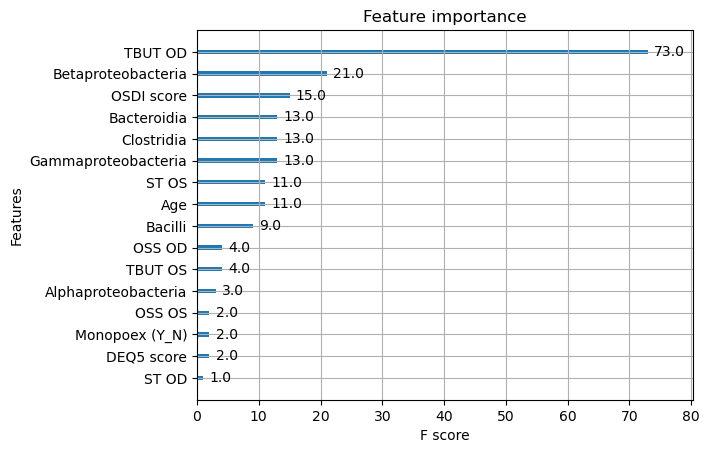

In [13]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

[15:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


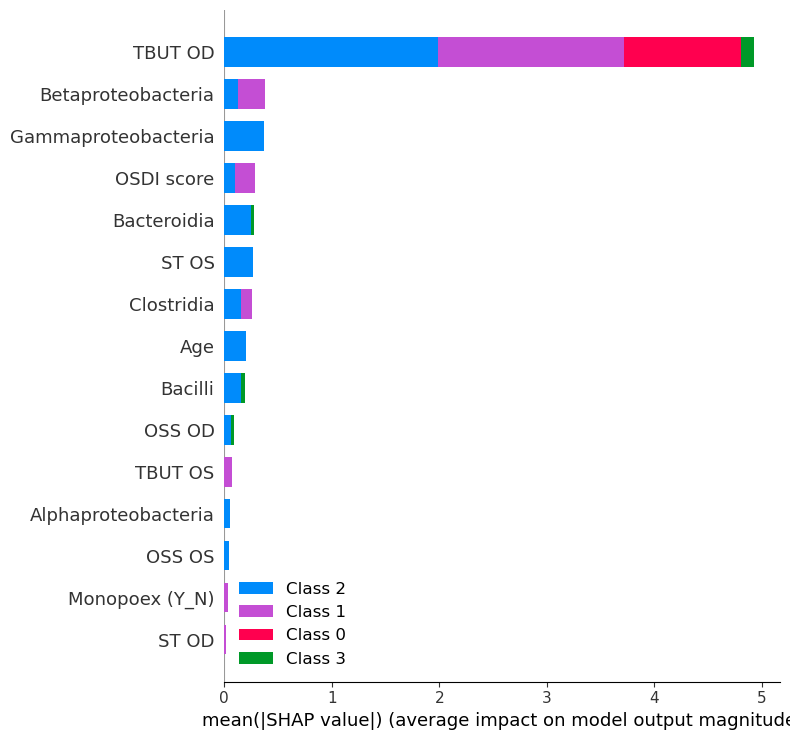

In [14]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

shap_valuesxgb = explainerxgb.shap_values(X_test.iloc[:,:])

shap.summary_plot(shap_valuesxgb, X_test, plot_type='bar', max_display=15)

In [15]:
# Make a customized SHAP plot with global values for each feaature

my_featuresxgb = clfxgb.get_booster().feature_names

shap_listxgb0 = []
shap_listxgb1 = []
shap_listxgb2 = []
shap_listxgb3 = []

for i in range(59):
    shap_listxgb0.append(abs(shap_valuesxgb[0][:,i,]).mean())
    shap_listxgb1.append(abs(shap_valuesxgb[1][:,i,]).mean())
    shap_listxgb2.append(abs(shap_valuesxgb[2][:,i,]).mean())
    shap_listxgb3.append(abs(shap_valuesxgb[3][:,i,]).mean())
    
shap_dictxgb = {}
# Add up shap values from all four classes (DESL 1-4)
for i in range(len(shap_listxgb0)):
    shap_dictxgb[my_featuresxgb[i]] = shap_listxgb0[i]
    shap_dictxgb[my_featuresxgb[i]] += shap_listxgb1[i]
    shap_dictxgb[my_featuresxgb[i]] += shap_listxgb2[i]
    shap_dictxgb[my_featuresxgb[i]] += shap_listxgb3[i]
    
# Sort in decreasing order
shap_dictxgb = {k:v for k, v in sorted(shap_dictxgb.items(), key=lambda item: item[1], reverse=True)}

most_important_featuresxgb = []
most_important_valuesxgb = []

for k, v in shap_dictxgb.items():
    most_important_featuresxgb.append(k)
    most_important_valuesxgb.append(v)
    
# Choose top X features
most_important_featuresxgb = most_important_featuresxgb[:20]
most_important_valuesxgb = most_important_valuesxgb[:20]

most_important_featuresxgb.reverse()
most_important_valuesxgb.reverse()

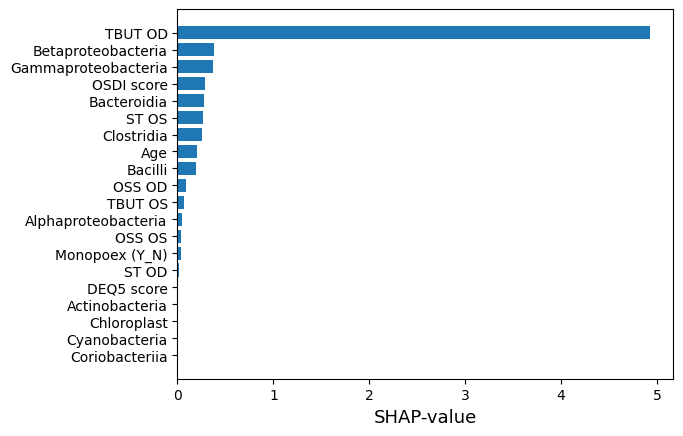

In [16]:
plt.barh(most_important_featuresxgb, most_important_valuesxgb)
ax = plt.gca()
plt.xlabel('SHAP-value', size=13)
plt.show()

### LightGBM

In [17]:
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 20
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -1.306252
[LightGBM] [Info] Start training from score -0.652325
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

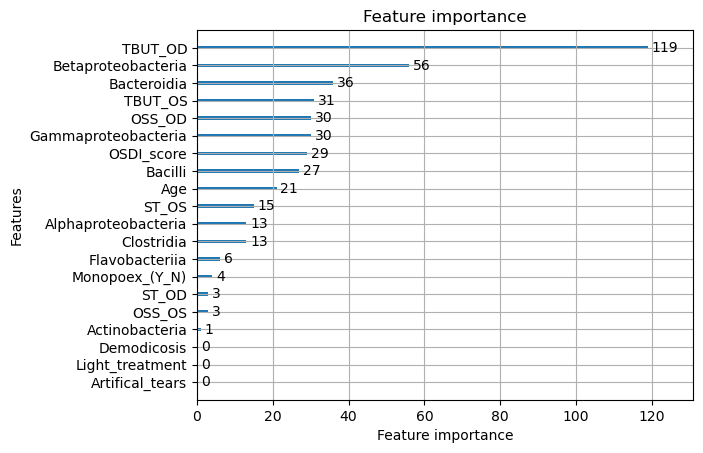

In [18]:
lgb.plot_importance(clflgbm, max_num_features=20, ignore_zero=False)

In [19]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X_test)

In [20]:
# Compute SHAP values for the dataset

#shap_valueslgbm = explainerlgbm(X)
shap_valueslgbm = explainerlgbm.shap_values(X_test.iloc[:,:])

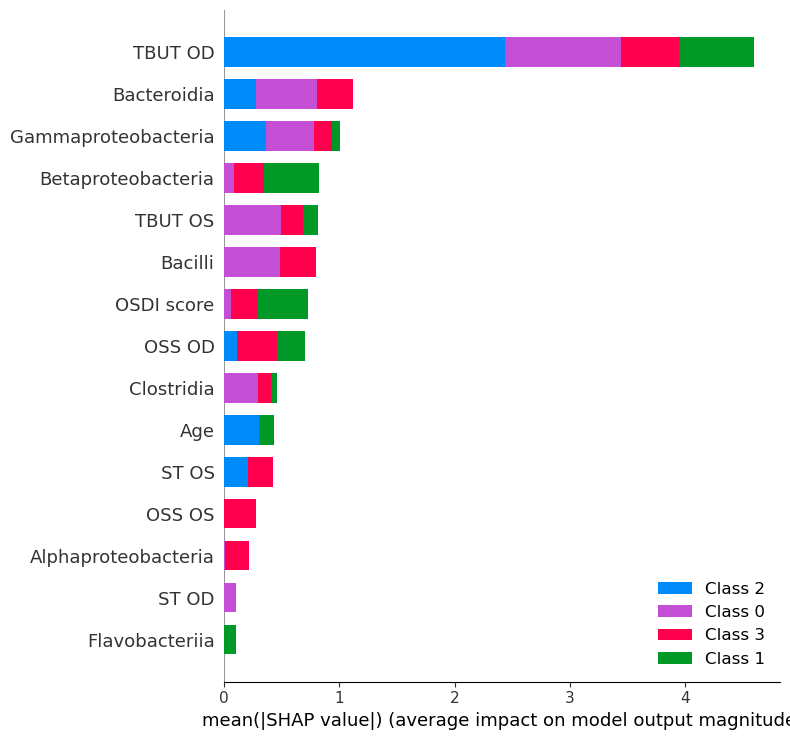

In [21]:
shap.summary_plot(shap_valueslgbm, X_test, plot_type='bar', max_display=15)

In [22]:
# Make a customized SHAP plot with global values for each feaature

my_features = clflgbm.feature_name_

shap_list0 = []
shap_list1 = []
shap_list2 = []
shap_list3 = []

for i in range(59):
    shap_list0.append(abs(shap_valueslgbm[0][:,i,]).mean())
    shap_list1.append(abs(shap_valueslgbm[1][:,i,]).mean())
    shap_list2.append(abs(shap_valueslgbm[2][:,i,]).mean())
    shap_list3.append(abs(shap_valueslgbm[3][:,i,]).mean())
    
shap_dict = {}
# Add up shap values from all four classes (DESL 1-4)
for i in range(len(shap_list0)):
    shap_dict[my_features[i]] = shap_list0[i]
    shap_dict[my_features[i]] += shap_list1[i]
    shap_dict[my_features[i]] += shap_list2[i]
    shap_dict[my_features[i]] += shap_list3[i]
    
# Sort in decreasing order
shap_dict = {k:v for k, v in sorted(shap_dict.items(), key=lambda item: item[1], reverse=True)}

most_important_features = []
most_important_values = []

for k, v in shap_dict.items():
    most_important_features.append(k)
    most_important_values.append(v)
    
# Choose top X features
most_important_features = most_important_features[:20]
most_important_values = most_important_values[:20]

most_important_features.reverse()
most_important_values.reverse()

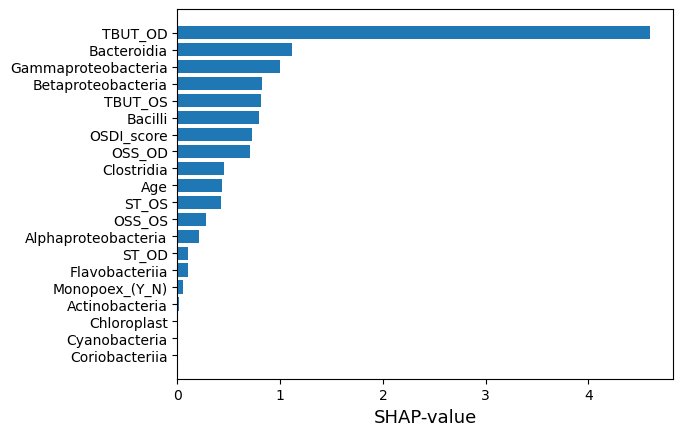

In [23]:
plt.barh(most_important_features, most_important_values)
ax = plt.gca()
plt.xlabel('SHAP-value', size=13)
plt.show()